In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry_convert as pc
from shapely.geometry import box

In [20]:
file = open('wosm-countries-202408.txt', 'r', encoding='utf-8')
temp = file.read()
countries_names = temp.split("\n")
file.close()
# Converter nomes dos países para códigos Alpha-2
country_codes_alpha3 = [pc.country_name_to_country_alpha3(pais) for pais in countries_names]

In [16]:
# Carregar o mapa-múndi
world = gpd.read_file("geoBoundariesCGAZ_ADM0.shp")

,shapeGroup,shapeType,shapeName,geometry
0,AFG,ADM0,Afghanistan,"POLYGON ((74.88986 37.23409, 74.88962 37.23314..."
1,GBR,ADM0,United Kingdom,"MULTIPOLYGON (((33.01302 34.64377, 33.01275 34..."
2,ALB,ADM0,Albania,"POLYGON ((20.0789 42.5558, 20.07928 42.55546, ..."
3,DZA,ADM0,Algeria,"POLYGON ((8.64194 36.94096, 8.64195 36.9407, 8..."
4,USA,ADM0,United States,"MULTIPOLYGON (((-168.15791 -14.53181, -168.161..."
...,...,...,...,...
213,126,DISP,Sanafir & Tiran Is.,"MULTIPOLYGON (((34.69143 27.95899, 34.69176 27..."
214,127,DISP,Senkakus,"POLYGON ((123.47986 25.7507, 123.48736 25.7498..."
215,128,DISP,Spratly Is,"POLYGON ((114.33955 11.44331, 114.33958 11.44,..."
216,129,DISP,West Bank,"POLYGON ((35.555 32.38936, 35.55517 32.38919, ..."


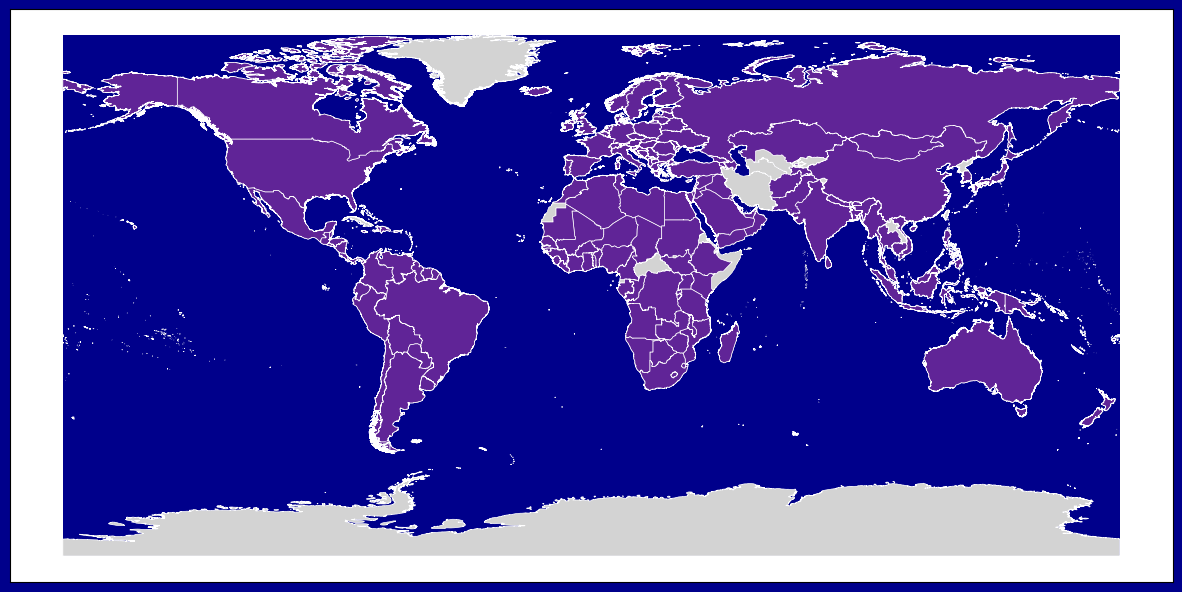

In [35]:
# Filtrar apenas os países da lista
selected_countries = world[world['shapeGroup'].isin(country_codes_alpha3)]

# Criar um polígono que cobre toda a área do mapa
bounds = world.total_bounds
background = gpd.GeoDataFrame(geometry=[box(bounds[0], bounds[1], bounds[2], bounds[3])], crs=world.crs)

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10), facecolor='darkblue')

# Plotar o fundo azul escuro
background.plot(ax=ax, color='darkblue')

world.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.5)
selected_countries.plot(ax=ax, color='#602497', edgecolor='white', linewidth=0.5)

# Remover os marcadores e números nas bordas do mapa
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig('mapa_paises_wosm.svg', format='svg')

plt.show()